In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
df = pd.read_csv('listings_SanFan.csv')

# u'zipcode',u'location_price',,u'instant_bookable', u'host_is_superhost',u'host_response_rate',
selected_features = [u'price',u'accommodates',u'host_response_time',
       u'bathrooms', u'bedrooms', u'beds',u'security_deposit', u'cleaning_fee', u'guests_included',
       u'extra_people', u'minimum_nights', u'maximum_nights',u'guests_included',  
       u'availability_365',
       u'number_of_reviews', u'review_scores_rating',u'review_scores_cleanliness', u'review_scores_checkin',
       u'review_scores_communication', u'review_scores_location',
       u'review_scores_value', u'house_rules',u'amenities','bed_type', 'room_type', 'cancellation_policy', 'property_type']
df = df.loc[:, selected_features]
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df.head()

/var/folders/3p/nhh5pbns7lx26mfsp6bg3hsm0000gn/T/ipykernel_28238/2345046068.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
0,$56.00,4,within an hour,1.0,1.0,2.0,$100.00,$30.00,2,$15.00,...,10.0,10.0,10.0,10.0,- Private bathroom is on the first floor (slig...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House
1,$36.00,2,within an hour,1.0,1.0,1.0,$100.00,$35.00,1,$20.00,...,10.0,10.0,10.0,10.0,1. NO SMOKING! This rule applies for inside ou...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium
2,$80.00,6,within an hour,1.5,2.0,3.0,$150.00,$65.00,4,$15.00,...,10.0,10.0,10.0,10.0,"I don't ask much, just to please respect the s...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse
3,$80.00,2,within a few hours,1.0,1.0,1.0,$100.00,$10.00,2,$10.00,...,10.0,10.0,10.0,10.0,Guests should treat my condo as their home wit...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium
4,$20.00,3,within an hour,1.0,1.0,1.0,$100.00,$50.00,1,$10.00,...,10.0,10.0,10.0,9.0,If using the kitchen please clean up after you...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment


In [2]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,guests_included,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5.207000e+03,5207.000000,5207.00000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000
mean,3.799309,1.287210,1.442673,1.912426,1.848281,3.407720,4.131673e+05,1.848281,176.82946,25.378721,95.745535,9.593048,9.867102,9.882658,9.656232,9.633762
std,2.511796,0.575333,0.916683,1.361062,1.476421,11.581423,2.976021e+07,1.476421,130.28602,38.664955,5.967414,0.750805,0.448679,0.399602,0.688060,0.657208
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,0.00000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+01,1.000000,56.00000,2.000000,94.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,1.000000,155.00000,11.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,5.000000,1.500000,2.000000,2.000000,2.000000,2.000000,1.125000e+03,2.000000,311.50000,32.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,16.000000,8.000000,10.000000,16.000000,15.000000,365.000000,2.147484e+09,15.000000,365.00000,410.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5207 entries, 0 to 5206
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        5207 non-null   object 
 1   accommodates                 5207 non-null   int64  
 2   host_response_time           5207 non-null   object 
 3   bathrooms                    5207 non-null   float64
 4   bedrooms                     5207 non-null   float64
 5   beds                         5207 non-null   float64
 6   security_deposit             5207 non-null   object 
 7   cleaning_fee                 5207 non-null   object 
 8   guests_included              5207 non-null   int64  
 9   extra_people                 5207 non-null   object 
 10  minimum_nights               5207 non-null   int64  
 11  maximum_nights               5207 non-null   int64  
 12  guests_included              5207 non-null   int64  
 13  availability_365  

In [4]:
df.head()

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
0,$56.00,4,within an hour,1.0,1.0,2.0,$100.00,$30.00,2,$15.00,...,10.0,10.0,10.0,10.0,- Private bathroom is on the first floor (slig...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House
1,$36.00,2,within an hour,1.0,1.0,1.0,$100.00,$35.00,1,$20.00,...,10.0,10.0,10.0,10.0,1. NO SMOKING! This rule applies for inside ou...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium
2,$80.00,6,within an hour,1.5,2.0,3.0,$150.00,$65.00,4,$15.00,...,10.0,10.0,10.0,10.0,"I don't ask much, just to please respect the s...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse
3,$80.00,2,within a few hours,1.0,1.0,1.0,$100.00,$10.00,2,$10.00,...,10.0,10.0,10.0,10.0,Guests should treat my condo as their home wit...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium
4,$20.00,3,within an hour,1.0,1.0,1.0,$100.00,$50.00,1,$10.00,...,10.0,10.0,10.0,9.0,If using the kitchen please clean up after you...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment


In [5]:
df.tail()

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
5202,$78.00,2,within an hour,1.0,1.0,1.0,$100.00,$100.00,1,$25.00,...,10.0,10.0,10.0,10.0,"No house parties, No pets, no smoking, respect...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Entire home/apt,strict,Apartment
5203,$60.00,1,within an hour,1.0,1.0,1.0,$250.00,$15.00,1,$0.00,...,10.0,10.0,10.0,10.0,- I'll be living in the living room with my fr...,"{""Wireless Internet"",""Air conditioning"",Kitche...",Pull-out Sofa,Private room,flexible,Townhouse
5204,$30.00,3,within an hour,1.0,1.0,1.0,$120.00,$5.00,1,$7.00,...,10.0,10.0,10.0,10.0,House Rules 1. All bookings require a security...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,flexible,House
5205,$189.00,3,within a few hours,1.0,0.0,2.0,$100.00,$30.00,1,$0.00,...,10.0,10.0,10.0,10.0,Please be respectful of other boaters and kee...,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",Real Bed,Entire home/apt,moderate,Boat
5206,$200.00,4,within an hour,2.0,2.0,2.0,$100.00,$50.00,1,$0.00,...,10.0,10.0,10.0,10.0,- Shoes off in the house,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Entire home/apt,flexible,Apartment


In [6]:
df.sample(frac=1)

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
362,$50.00,2,within an hour,1.0,1.0,1.0,$100.00,$50.00,1,$0.00,...,10.0,10.0,10.0,10.0,Non smokers only. No shoes in the house. Must ...,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,Private room,strict,Condominium
3149,$100.00,2,within a day,1.0,1.0,1.0,$100.00,$15.00,1,$15.00,...,10.0,10.0,10.0,10.0,House Rules 1. All bookings require a security...,"{TV,""Wireless Internet"",""Air conditioning"",""In...",Real Bed,Private room,flexible,Condominium
1568,$146.00,5,within an hour,1.0,2.0,2.0,$100.00,$30.00,2,$20.00,...,10.0,10.0,10.0,10.0,Smoking allowed outside on patio. Absolutely n...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Entire home/apt,moderate,Apartment
1594,$185.00,4,within an hour,1.0,1.0,1.0,$100.00,$60.00,1,$0.00,...,10.0,10.0,10.0,9.0,I enjoy sharing my home with you. Please respe...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Entire home/apt,moderate,Apartment
4665,$30.00,1,within a few hours,1.0,1.0,1.0,$100.00,$50.00,1,$10.00,...,10.0,10.0,10.0,10.0,1. Please wear house slippers provided. 2. Ple...,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",Real Bed,Private room,moderate,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,$60.00,4,within an hour,1.0,1.0,3.0,$100.00,$50.00,2,$30.00,...,10.0,10.0,9.0,10.0,Keep in mind that the place is not too soundpr...,"{""Wireless Internet"",""Air conditioning"",Kitche...",Futon,Private room,moderate,Apartment
1279,$60.00,2,within a few hours,1.0,1.0,1.0,$100.00,$5.00,1,$5.00,...,10.0,10.0,10.0,9.0,House Rules 1. All bookings require a security...,"{""Wireless Internet"",""Air conditioning"",""Pets ...",Real Bed,Private room,moderate,Apartment
732,$150.00,2,within an hour,1.5,1.0,1.0,$100.00,$85.00,2,$100.00,...,10.0,10.0,10.0,9.0,"No Smoking, No Pets. No parties. Not toddler f...","{Internet,""Wireless Internet"",""Air conditionin...",Real Bed,Entire home/apt,moderate,Loft
686,$130.00,6,within an hour,1.5,2.0,2.0,$100.00,$50.00,1,$0.00,...,10.0,10.0,10.0,10.0,"No parties, smoking, or pets.","{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Entire home/apt,moderate,Apartment


In [7]:
df['price'] = df['price'].str.replace("\$|,", "")
df['price'] = df['price'].str.replace("$", "")
df['price'] = df['price'].str.replace(",", "")


In [8]:
df['security_deposit'] = df['security_deposit'].str.replace("\$|","")
df['security_deposit'] = df['security_deposit'].str.replace("$","")
df['security_deposit'] = df['security_deposit'].str.replace(",","")

In [9]:
df

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
0,56.00,4,within an hour,1.0,1.0,2.0,100.00,$30.00,2,$15.00,...,10.0,10.0,10.0,10.0,- Private bathroom is on the first floor (slig...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House
1,36.00,2,within an hour,1.0,1.0,1.0,100.00,$35.00,1,$20.00,...,10.0,10.0,10.0,10.0,1. NO SMOKING! This rule applies for inside ou...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium
2,80.00,6,within an hour,1.5,2.0,3.0,150.00,$65.00,4,$15.00,...,10.0,10.0,10.0,10.0,"I don't ask much, just to please respect the s...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse
3,80.00,2,within a few hours,1.0,1.0,1.0,100.00,$10.00,2,$10.00,...,10.0,10.0,10.0,10.0,Guests should treat my condo as their home wit...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium
4,20.00,3,within an hour,1.0,1.0,1.0,100.00,$50.00,1,$10.00,...,10.0,10.0,10.0,9.0,If using the kitchen please clean up after you...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,78.00,2,within an hour,1.0,1.0,1.0,100.00,$100.00,1,$25.00,...,10.0,10.0,10.0,10.0,"No house parties, No pets, no smoking, respect...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Entire home/apt,strict,Apartment
5203,60.00,1,within an hour,1.0,1.0,1.0,250.00,$15.00,1,$0.00,...,10.0,10.0,10.0,10.0,- I'll be living in the living room with my fr...,"{""Wireless Internet"",""Air conditioning"",Kitche...",Pull-out Sofa,Private room,flexible,Townhouse
5204,30.00,3,within an hour,1.0,1.0,1.0,120.00,$5.00,1,$7.00,...,10.0,10.0,10.0,10.0,House Rules 1. All bookings require a security...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,flexible,House
5205,189.00,3,within a few hours,1.0,0.0,2.0,100.00,$30.00,1,$0.00,...,10.0,10.0,10.0,10.0,Please be respectful of other boaters and kee...,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",Real Bed,Entire home/apt,moderate,Boat


In [10]:
df['price']=pd.to_numeric(df['price'])

In [11]:
df

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
0,56.0,4,within an hour,1.0,1.0,2.0,100.00,$30.00,2,$15.00,...,10.0,10.0,10.0,10.0,- Private bathroom is on the first floor (slig...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House
1,36.0,2,within an hour,1.0,1.0,1.0,100.00,$35.00,1,$20.00,...,10.0,10.0,10.0,10.0,1. NO SMOKING! This rule applies for inside ou...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium
2,80.0,6,within an hour,1.5,2.0,3.0,150.00,$65.00,4,$15.00,...,10.0,10.0,10.0,10.0,"I don't ask much, just to please respect the s...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse
3,80.0,2,within a few hours,1.0,1.0,1.0,100.00,$10.00,2,$10.00,...,10.0,10.0,10.0,10.0,Guests should treat my condo as their home wit...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium
4,20.0,3,within an hour,1.0,1.0,1.0,100.00,$50.00,1,$10.00,...,10.0,10.0,10.0,9.0,If using the kitchen please clean up after you...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,78.0,2,within an hour,1.0,1.0,1.0,100.00,$100.00,1,$25.00,...,10.0,10.0,10.0,10.0,"No house parties, No pets, no smoking, respect...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Entire home/apt,strict,Apartment
5203,60.0,1,within an hour,1.0,1.0,1.0,250.00,$15.00,1,$0.00,...,10.0,10.0,10.0,10.0,- I'll be living in the living room with my fr...,"{""Wireless Internet"",""Air conditioning"",Kitche...",Pull-out Sofa,Private room,flexible,Townhouse
5204,30.0,3,within an hour,1.0,1.0,1.0,120.00,$5.00,1,$7.00,...,10.0,10.0,10.0,10.0,House Rules 1. All bookings require a security...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,flexible,House
5205,189.0,3,within a few hours,1.0,0.0,2.0,100.00,$30.00,1,$0.00,...,10.0,10.0,10.0,10.0,Please be respectful of other boaters and kee...,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",Real Bed,Entire home/apt,moderate,Boat


In [12]:
df['security_deposit']=pd.to_numeric(df['security_deposit'])

In [13]:
df['cleaning_fee'] = df['cleaning_fee'].str.replace(r'[^\d]', "", regex=True)

In [14]:
df

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
0,56.0,4,within an hour,1.0,1.0,2.0,100.0,3000,2,$15.00,...,10.0,10.0,10.0,10.0,- Private bathroom is on the first floor (slig...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House
1,36.0,2,within an hour,1.0,1.0,1.0,100.0,3500,1,$20.00,...,10.0,10.0,10.0,10.0,1. NO SMOKING! This rule applies for inside ou...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium
2,80.0,6,within an hour,1.5,2.0,3.0,150.0,6500,4,$15.00,...,10.0,10.0,10.0,10.0,"I don't ask much, just to please respect the s...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse
3,80.0,2,within a few hours,1.0,1.0,1.0,100.0,1000,2,$10.00,...,10.0,10.0,10.0,10.0,Guests should treat my condo as their home wit...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium
4,20.0,3,within an hour,1.0,1.0,1.0,100.0,5000,1,$10.00,...,10.0,10.0,10.0,9.0,If using the kitchen please clean up after you...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,78.0,2,within an hour,1.0,1.0,1.0,100.0,10000,1,$25.00,...,10.0,10.0,10.0,10.0,"No house parties, No pets, no smoking, respect...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Entire home/apt,strict,Apartment
5203,60.0,1,within an hour,1.0,1.0,1.0,250.0,1500,1,$0.00,...,10.0,10.0,10.0,10.0,- I'll be living in the living room with my fr...,"{""Wireless Internet"",""Air conditioning"",Kitche...",Pull-out Sofa,Private room,flexible,Townhouse
5204,30.0,3,within an hour,1.0,1.0,1.0,120.0,500,1,$7.00,...,10.0,10.0,10.0,10.0,House Rules 1. All bookings require a security...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,flexible,House
5205,189.0,3,within a few hours,1.0,0.0,2.0,100.0,3000,1,$0.00,...,10.0,10.0,10.0,10.0,Please be respectful of other boaters and kee...,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",Real Bed,Entire home/apt,moderate,Boat


In [15]:
df['extra_people'] = df['extra_people'].str.replace(r'[^\d]', "", regex=True)

In [16]:
df

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
0,56.0,4,within an hour,1.0,1.0,2.0,100.0,3000,2,1500,...,10.0,10.0,10.0,10.0,- Private bathroom is on the first floor (slig...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House
1,36.0,2,within an hour,1.0,1.0,1.0,100.0,3500,1,2000,...,10.0,10.0,10.0,10.0,1. NO SMOKING! This rule applies for inside ou...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium
2,80.0,6,within an hour,1.5,2.0,3.0,150.0,6500,4,1500,...,10.0,10.0,10.0,10.0,"I don't ask much, just to please respect the s...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse
3,80.0,2,within a few hours,1.0,1.0,1.0,100.0,1000,2,1000,...,10.0,10.0,10.0,10.0,Guests should treat my condo as their home wit...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium
4,20.0,3,within an hour,1.0,1.0,1.0,100.0,5000,1,1000,...,10.0,10.0,10.0,9.0,If using the kitchen please clean up after you...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,78.0,2,within an hour,1.0,1.0,1.0,100.0,10000,1,2500,...,10.0,10.0,10.0,10.0,"No house parties, No pets, no smoking, respect...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Entire home/apt,strict,Apartment
5203,60.0,1,within an hour,1.0,1.0,1.0,250.0,1500,1,000,...,10.0,10.0,10.0,10.0,- I'll be living in the living room with my fr...,"{""Wireless Internet"",""Air conditioning"",Kitche...",Pull-out Sofa,Private room,flexible,Townhouse
5204,30.0,3,within an hour,1.0,1.0,1.0,120.0,500,1,700,...,10.0,10.0,10.0,10.0,House Rules 1. All bookings require a security...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,flexible,House
5205,189.0,3,within a few hours,1.0,0.0,2.0,100.0,3000,1,000,...,10.0,10.0,10.0,10.0,Please be respectful of other boaters and kee...,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",Real Bed,Entire home/apt,moderate,Boat


In [17]:
df['availability'] = df['availability_365'] / 365

In [18]:
df

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type,availability
0,56.0,4,within an hour,1.0,1.0,2.0,100.0,3000,2,1500,...,10.0,10.0,10.0,- Private bathroom is on the first floor (slig...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House,0.087671
1,36.0,2,within an hour,1.0,1.0,1.0,100.0,3500,1,2000,...,10.0,10.0,10.0,1. NO SMOKING! This rule applies for inside ou...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium,0.000000
2,80.0,6,within an hour,1.5,2.0,3.0,150.0,6500,4,1500,...,10.0,10.0,10.0,"I don't ask much, just to please respect the s...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse,0.432877
3,80.0,2,within a few hours,1.0,1.0,1.0,100.0,1000,2,1000,...,10.0,10.0,10.0,Guests should treat my condo as their home wit...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium,0.142466
4,20.0,3,within an hour,1.0,1.0,1.0,100.0,5000,1,1000,...,10.0,10.0,9.0,If using the kitchen please clean up after you...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment,0.315068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,78.0,2,within an hour,1.0,1.0,1.0,100.0,10000,1,2500,...,10.0,10.0,10.0,"No house parties, No pets, no smoking, respect...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Entire home/apt,strict,Apartment,0.917808
5203,60.0,1,within an hour,1.0,1.0,1.0,250.0,1500,1,000,...,10.0,10.0,10.0,- I'll be living in the living room with my fr...,"{""Wireless Internet"",""Air conditioning"",Kitche...",Pull-out Sofa,Private room,flexible,Townhouse,0.180822
5204,30.0,3,within an hour,1.0,1.0,1.0,120.0,500,1,700,...,10.0,10.0,10.0,House Rules 1. All bookings require a security...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,flexible,House,0.213699
5205,189.0,3,within a few hours,1.0,0.0,2.0,100.0,3000,1,000,...,10.0,10.0,10.0,Please be respectful of other boaters and kee...,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",Real Bed,Entire home/apt,moderate,Boat,0.479452


In [19]:
df.isna().sum()

price                          0
accommodates                   0
host_response_time             0
bathrooms                      0
bedrooms                       0
beds                           0
security_deposit               0
cleaning_fee                   0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
guests_included                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
house_rules                    0
amenities                      0
bed_type                       0
room_type                      0
cancellation_policy            0
property_type                  0
availability                   0
dtype: int64

In [20]:
house_rules = df['house_rules'].str.lower()

smoking = house_rules.str.contains("smoke|smoking", na= False)
df.loc[:, 'smoking'] = - smoking # False: No smoking allowed

pet = house_rules.str.contains("pet", na=False)
df.loc[:, 'pet'] = - pet

party = house_rules.str.contains("party|parties", na=False)
df.loc[:, 'party'] = - party

guest = house_rules.str.contains("guest|guests", na=False)
df.loc[:, 'guest'] = - guest

df = df.drop(['house_rules'], axis = 1)

In [21]:
df

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,amenities,bed_type,room_type,cancellation_policy,property_type,availability,smoking,pet,party,guest
0,56.0,4,within an hour,1.0,1.0,2.0,100.0,3000,2,1500,...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House,0.087671,True,True,True,True
1,36.0,2,within an hour,1.0,1.0,1.0,100.0,3500,1,2000,...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium,0.000000,False,False,True,False
2,80.0,6,within an hour,1.5,2.0,3.0,150.0,6500,4,1500,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse,0.432877,True,True,True,True
3,80.0,2,within a few hours,1.0,1.0,1.0,100.0,1000,2,1000,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium,0.142466,True,True,True,False
4,20.0,3,within an hour,1.0,1.0,1.0,100.0,5000,1,1000,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment,0.315068,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,78.0,2,within an hour,1.0,1.0,1.0,100.0,10000,1,2500,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Entire home/apt,strict,Apartment,0.917808,False,False,False,True
5203,60.0,1,within an hour,1.0,1.0,1.0,250.0,1500,1,000,...,"{""Wireless Internet"",""Air conditioning"",Kitche...",Pull-out Sofa,Private room,flexible,Townhouse,0.180822,False,True,False,False
5204,30.0,3,within an hour,1.0,1.0,1.0,120.0,500,1,700,...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,flexible,House,0.213699,False,True,True,False
5205,189.0,3,within a few hours,1.0,0.0,2.0,100.0,3000,1,000,...,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",Real Bed,Entire home/apt,moderate,Boat,0.479452,True,True,True,True


In [22]:
import re
# AMENITIES
amenities = list(df['amenities'])
total = ','.join(amenities)
total = total.replace("{", "").replace("}","").replace("\"", "").split(",")
amenity_items = list(set(total))
amenity_items = list(filter(None, amenity_items))
for item in amenity_items:
    if re.match(r'translation',item):
        amenity_items.remove(item)

In [23]:
df

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,amenities,bed_type,room_type,cancellation_policy,property_type,availability,smoking,pet,party,guest
0,56.0,4,within an hour,1.0,1.0,2.0,100.0,3000,2,1500,...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House,0.087671,True,True,True,True
1,36.0,2,within an hour,1.0,1.0,1.0,100.0,3500,1,2000,...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium,0.000000,False,False,True,False
2,80.0,6,within an hour,1.5,2.0,3.0,150.0,6500,4,1500,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse,0.432877,True,True,True,True
3,80.0,2,within a few hours,1.0,1.0,1.0,100.0,1000,2,1000,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium,0.142466,True,True,True,False
4,20.0,3,within an hour,1.0,1.0,1.0,100.0,5000,1,1000,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment,0.315068,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,78.0,2,within an hour,1.0,1.0,1.0,100.0,10000,1,2500,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Entire home/apt,strict,Apartment,0.917808,False,False,False,True
5203,60.0,1,within an hour,1.0,1.0,1.0,250.0,1500,1,000,...,"{""Wireless Internet"",""Air conditioning"",Kitche...",Pull-out Sofa,Private room,flexible,Townhouse,0.180822,False,True,False,False
5204,30.0,3,within an hour,1.0,1.0,1.0,120.0,500,1,700,...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,flexible,House,0.213699,False,True,True,False
5205,189.0,3,within a few hours,1.0,0.0,2.0,100.0,3000,1,000,...,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",Real Bed,Entire home/apt,moderate,Boat,0.479452,True,True,True,True


In [24]:
amenity_items

['Table corner guards',
 'Path to entrance lit at night',
 'Internet',
 'Baby bath',
 'Pack ’n Play/travel crib',
 'Long term stays allowed',
 'Pocket wifi',
 'Bathtub',
 'Window guards',
 'Wide hallway clearance',
 'Dishes and silverware',
 'Ethernet connection',
 'Microwave',
 'Firm matress',
 'Washer',
 'Dog(s)',
 'Wheelchair accessible',
 'Grab-rails for shower and toilet',
 'Paid parking off premises',
 'Accessible-height toilet',
 'Baby monitor',
 'Accessible-height bed',
 'Smoke detector',
 'Dryer',
 'Iron',
 'Buzzer/wireless intercom',
 'Luggage dropoff allowed',
 'Wide clearance to shower and toilet',
 'Private entrance',
 'Heating',
 'Doorman Entry',
 'Beach essentials',
 'Elevator in building',
 'Keypad',
 'Children’s dinnerware',
 'Crib',
 'Lock on bedroom door',
 'Cleaning before checkout',
 'Garden or backyard',
 'Free parking on premises',
 'Laptop friendly workspace',
 'Hair dryer',
 'TV',
 'Refrigerator',
 'Free parking on street',
 'Flat smooth pathway to front door',

In [25]:
df



,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,amenities,bed_type,room_type,cancellation_policy,property_type,availability,smoking,pet,party,guest
0,56.0,4,within an hour,1.0,1.0,2.0,100.0,3000,2,1500,...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House,0.087671,True,True,True,True
1,36.0,2,within an hour,1.0,1.0,1.0,100.0,3500,1,2000,...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium,0.000000,False,False,True,False
2,80.0,6,within an hour,1.5,2.0,3.0,150.0,6500,4,1500,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse,0.432877,True,True,True,True
3,80.0,2,within a few hours,1.0,1.0,1.0,100.0,1000,2,1000,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium,0.142466,True,True,True,False
4,20.0,3,within an hour,1.0,1.0,1.0,100.0,5000,1,1000,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment,0.315068,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,78.0,2,within an hour,1.0,1.0,1.0,100.0,10000,1,2500,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Entire home/apt,strict,Apartment,0.917808,False,False,False,True
5203,60.0,1,within an hour,1.0,1.0,1.0,250.0,1500,1,000,...,"{""Wireless Internet"",""Air conditioning"",Kitche...",Pull-out Sofa,Private room,flexible,Townhouse,0.180822,False,True,False,False
5204,30.0,3,within an hour,1.0,1.0,1.0,120.0,500,1,700,...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,flexible,House,0.213699,False,True,True,False
5205,189.0,3,within a few hours,1.0,0.0,2.0,100.0,3000,1,000,...,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",Real Bed,Entire home/apt,moderate,Boat,0.479452,True,True,True,True


In [26]:
import re
# AMENITIES
amenities = list(df['amenities'])
total = ','.join(amenities)
total = total.replace("{", "").replace("}","").replace("\"", "").split(",")
amenity_items = list(set(total))
amenity_items = list(filter(None, amenity_items))
for item in amenity_items:
    if re.match(r'translation',item):
        amenity_items.remove(item)

In [28]:
amenities = list(df['amenities'])
new_table = pd.DataFrame(index=df.reset_index().values[:, 0], columns=amenity_items).fillna(0)

# Efficient vectorized approach for filling new_table
for item in amenity_items:
    new_table.loc[:, item] = np.vectorize(lambda x: 1 if item in x else 0)(amenities)

sum_table = np.array(new_table.sum())
ind = (-sum_table).argsort()[:60]
common_amenities = list(new_table.sum().iloc[ind].index)
df = df.drop(['amenities'], axis=1)
df = pd.concat([df, new_table[common_amenities]], axis=1)

print(df)

/var/folders/3p/nhh5pbns7lx26mfsp6bg3hsm0000gn/T/ipykernel_28238/1287921379.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_table = pd.DataFrame(index=df.reset_index().values[:, 0], columns=amenity_items).fillna(0)


      price  accommodates  host_response_time  bathrooms  bedrooms  beds  \
0      56.0             4      within an hour        1.0       1.0   2.0   
1      36.0             2      within an hour        1.0       1.0   1.0   
2      80.0             6      within an hour        1.5       2.0   3.0   
3      80.0             2  within a few hours        1.0       1.0   1.0   
4      20.0             3      within an hour        1.0       1.0   1.0   
...     ...           ...                 ...        ...       ...   ...   
5202   78.0             2      within an hour        1.0       1.0   1.0   
5203   60.0             1      within an hour        1.0       1.0   1.0   
5204   30.0             3      within an hour        1.0       1.0   1.0   
5205  189.0             3  within a few hours        1.0       0.0   2.0   
5206  200.0             4      within an hour        2.0       2.0   2.0   

      security_deposit cleaning_fee  guests_included extra_people  ...  \
0            

In [29]:
columns = ['bed_type', 'room_type', 'cancellation_policy', 'property_type', 'host_response_time']
for col in columns:
    # Get unique values in the column
    unique_values = list(df[col].unique())

    # Create a new empty DataFrame with columns for unique values
    new_table = pd.DataFrame(columns=unique_values, index=df.index)

    # Efficient vectorized approach for filling new_table
    for item in unique_values:
        new_table.loc[:, item] = np.vectorize(lambda x: 1 if item == x else 0)(df[col])

    # Concatenate the original DataFrame with the one-hot encoded columns
    df = pd.concat([df, new_table], axis=1)

    # Drop the original categorical column
    df = df.drop(col, axis=1)

[0.06954899 0.06388492 0.03772171 0.03584864 0.029832   0.0243041
 0.02029027 0.01951989 0.01782078 0.01724044 0.01602824 0.01571044
 0.01438462 0.01386759 0.01360872 0.01262563 0.0124803  0.01210355
 0.01166212 0.01152534 0.010529   0.01043649 0.01004956 0.00993523
 0.00969314 0.00958877 0.00934526 0.00924882 0.00915221 0.00904648
 0.00885723 0.00885319 0.00867937 0.00860087 0.0085164  0.00848348
 0.00845512 0.00837839 0.00834164 0.00829517 0.00824933 0.00813531
 0.00811262 0.00803571 0.00799441 0.00796034 0.00789436 0.00765896
 0.00764018 0.00751016]


array([[ 0.26261352,  0.14310777, -0.64006318, ...,  0.47686762,
         0.96919578, -0.80015716],
       [-0.22718656,  0.27336727,  0.8926921 , ..., -0.5253951 ,
         0.70210168,  0.21851227],
       [ 2.79923834, -2.91968854, -1.97463418, ...,  0.29166335,
        -0.57878321,  0.34311   ],
       ...,
       [-0.48269727,  0.64172179, -0.01654848, ..., -0.30165704,
         0.94597297,  0.58033264],
       [-1.39664517,  1.16944962, -2.57958829, ...,  2.56628599,
         0.54247153,  3.3702551 ],
       [-0.66596623, -0.03042628,  1.72859047, ...,  0.58140801,
        -1.10744947, -0.11644447]])

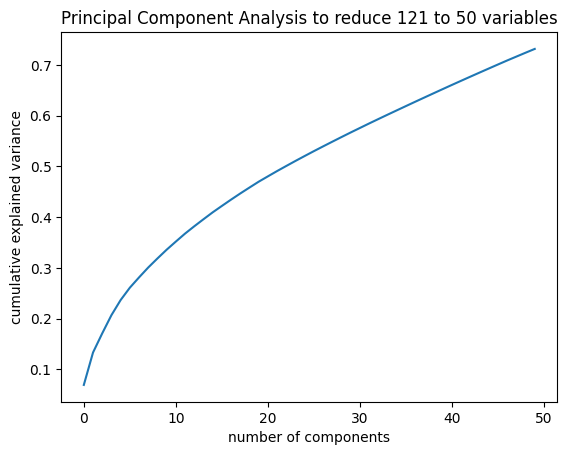

In [31]:
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
# df.drop(['longitude','latitude'], axis=1, inplace=True)
X = np.array(df.drop(['price'], axis = 1))
X_scaled = preprocessing.scale(X)
y =df['price']
pca = PCA(n_components=50)
X_scaled = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Principal Component Analysis to reduce 121 to 50 variables')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
X_scaled

[0 0 1 ... 0 0 0]


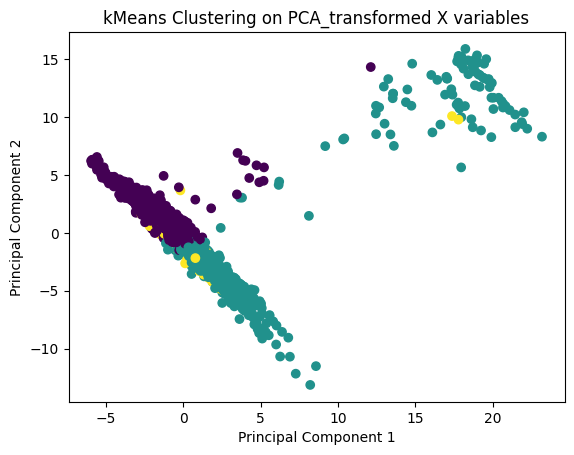

In [32]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(X_scaled)
print(y_pred)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
plt.title("kMeans Clustering on PCA_transformed X variables")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [33]:
y_pred
ind1= np.where(y_pred == 1)
ind1

(array([   2,    8,    9, ..., 5199, 5200, 5201]),)

In [38]:
df

,price,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,...,Dorm,Timeshare,Serviced apartment,Vacation home,Bungalow,Villa,within an hour,within a few hours,within a day,a few days or more
0,56.0,4,1.0,1.0,2.0,100.0,3000,2,1500,2,...,0,0,0,0,0,0,1,0,0,0
1,36.0,2,1.0,1.0,1.0,100.0,3500,1,2000,1,...,0,0,0,0,0,0,1,0,0,0
2,80.0,6,1.5,2.0,3.0,150.0,6500,4,1500,1,...,0,0,0,0,0,0,1,0,0,0
3,80.0,2,1.0,1.0,1.0,100.0,1000,2,1000,2,...,0,0,0,0,0,0,0,1,0,0
4,20.0,3,1.0,1.0,1.0,100.0,5000,1,1000,3,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,78.0,2,1.0,1.0,1.0,100.0,10000,1,2500,3,...,0,0,0,0,0,0,1,0,0,0
5203,60.0,1,1.0,1.0,1.0,250.0,1500,1,000,1,...,0,0,0,0,0,0,1,0,0,0
5204,30.0,3,1.0,1.0,1.0,120.0,500,1,700,1,...,0,0,0,0,0,0,1,0,0,0
5205,189.0,3,1.0,0.0,2.0,100.0,3000,1,000,2,...,0,0,0,0,0,0,0,1,0,0


In [49]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer  # Import for imputation (optional)

# Assuming 'df' is your DataFrame

# Select features (excluding the first column)
cluster_data = df.iloc[:, 1:]  # Use `.iloc` for integer-based indexing

# Target variable
y = df['price']

# Imputation (optional, uncomment if you have missing values)
# imputer = SimpleImputer(strategy='mean')  # Replace with 'median' or 'most_frequent' as needed
# X_imputed = imputer.fit_transform(cluster_data)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(cluster_data, y, test_size=0.2, random_state=0)

# Grid search parameters for n_estimators
tunedParameters = [{'n_estimators': range(50, 100, 10)}]

# Create and fit the GridSearchCV object (corrected criterion parameter)
clf = GridSearchCV(RandomForestRegressor(n_jobs=-1, criterion='squared_error'), param_grid=tunedParameters, cv=10)
clf.fit(X_train, y_train)

# Extract and print results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


0.245 (+/-0.826) for {'n_estimators': 50}
0.321 (+/-0.404) for {'n_estimators': 60}
0.373 (+/-0.274) for {'n_estimators': 70}
0.356 (+/-0.398) for {'n_estimators': 80}
0.352 (+/-0.381) for {'n_estimators': 90}


/Users/kraktate2003/PycharmProject/mini1/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/kraktate2003/PycharmProject/mini1/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/kraktate2003/PycharmProject/mini1/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/kraktate2003/PycharmProject/mini1/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/k

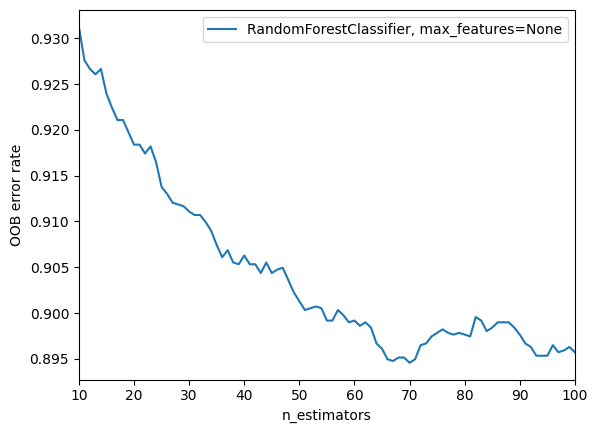

RandomForestRegressor(criterion='absolute_error', n_jobs=1)

In [56]:
X=cluster_data
y=df['price']
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
ensemble_clfs = [("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=0))]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

from sklearn.ensemble import RandomForestRegressor

X=cluster_data
y=df['price']
tunedParameters = [{'n_estimators':100}]

clf2 = RandomForestRegressor(n_jobs = 1, criterion='absolute_error', n_estimators=100)
#Fit Model
clf2.fit(X, y)

In [57]:
FeatImp = pd.DataFrame({'feature': list(X.columns), 'importance': list(clf2.feature_importances_)})
FeatImp = FeatImp.sort_values('importance', ascending = False)
#Set Index To Field You want to Sort Bar Chart By
FeatImp = FeatImp.set_index('feature')
FeatImp.head(100)
FeatImp.to_csv('feature_imp.csv')

In [58]:
FeatImp.index[0:30]

Index(['Entire home/apt', 'bathrooms', 'cleaning_fee', 'availability_365',
       'availability', 'number_of_reviews', 'extra_people', 'accommodates',
       'security_deposit', 'maximum_nights', 'bedrooms', 'minimum_nights',
       'review_scores_rating', 'beds', 'review_scores_location', 'Boat',
       'guests_included', 'guests_included', 'Indoor fireplace',
       'Doorman Entry', 'Elevator in building', 'within a day',
       'review_scores_cleanliness', 'Free parking on premises', 'Cable TV',
       'Lock on bedroom door', 'Gym', 'smoking', 'review_scores_value',
       'moderate'],
      dtype='object', name='feature')

In [59]:
FeatImp['importance'].values[0:30]

array([0.16612503, 0.10983139, 0.06677361, 0.03715567, 0.03484971,
       0.03440968, 0.03399673, 0.03392232, 0.02882468, 0.02348014,
       0.02171314, 0.0217033 , 0.01736992, 0.01670052, 0.01433884,
       0.01198318, 0.01026033, 0.00948528, 0.00922392, 0.00731525,
       0.00651216, 0.00633651, 0.00622409, 0.00618532, 0.00595387,
       0.00582674, 0.00578301, 0.00543593, 0.00532859, 0.00527168])

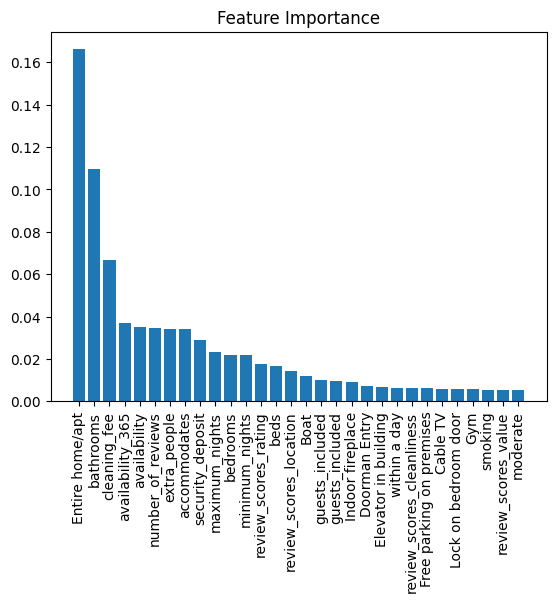

In [60]:
import matplotlib.pyplot as plt
plt.figure()

plt.title("Feature Importance")
y_pos = np.arange(len(FeatImp.index[0:30]))
plt.bar(y_pos,FeatImp['importance'].values[0:30])
plt.xticks(y_pos, FeatImp.index[0:30],rotation='vertical')
plt.show()

/var/folders/3p/nhh5pbns7lx26mfsp6bg3hsm0000gn/T/ipykernel_28238/3582954755.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


54.4

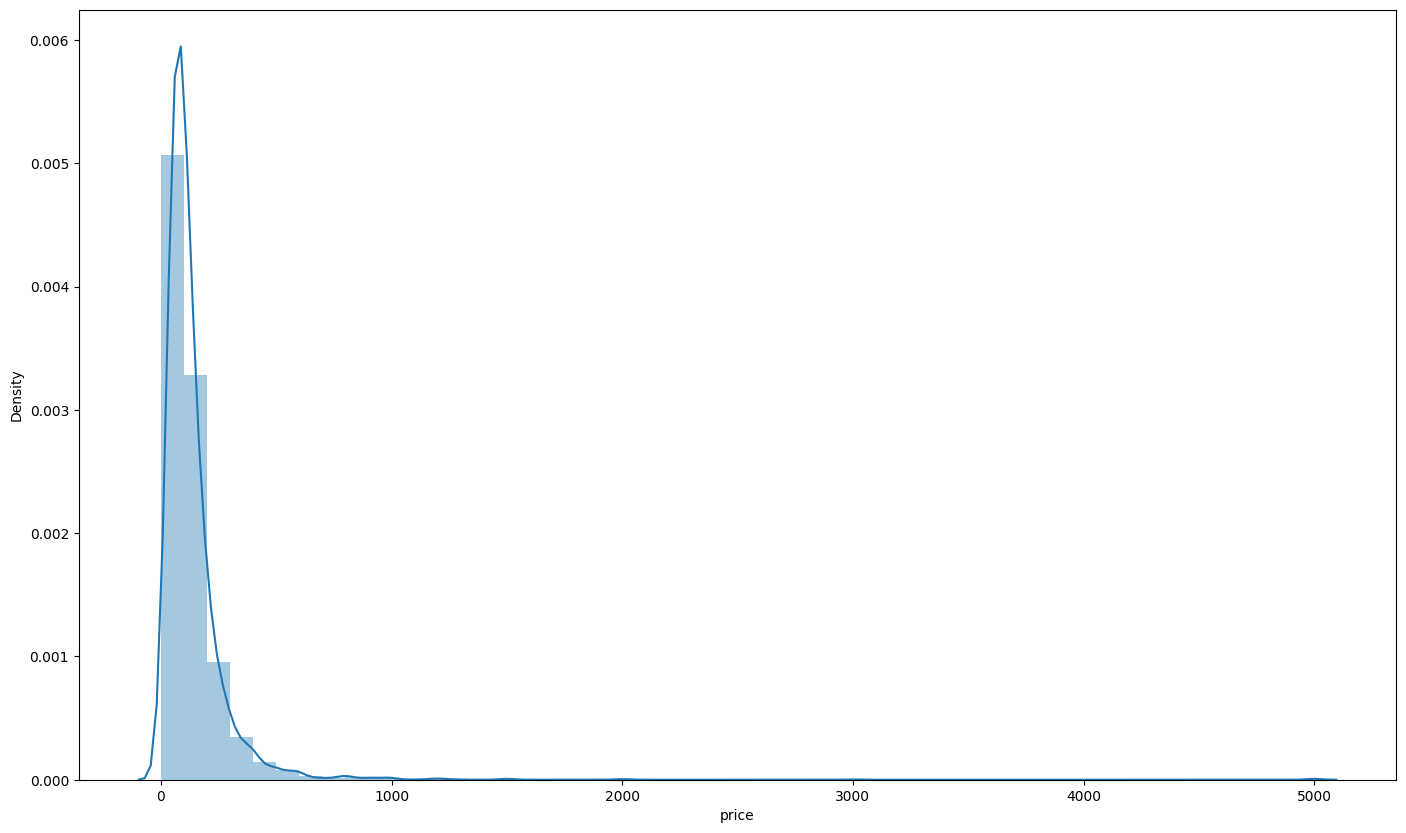

In [61]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(17,10))
# df['price'] = df.price.str.replace("\$|,", "").astype(float)
# df['price'].hist()
sns.distplot(df['price'])
# plt.show()
mean_price = df.price.iloc[:5].mean()
mean_price
# df['host_acceptance_rate'].head()

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Create KNN model: 5 closest neighbors
knn = KNeighborsRegressor(algorithm='brute', n_neighbors = 5)
cols = ['accommodates', 'bedrooms', 'bathrooms', 'beds']
knn.fit(X_train[cols], y_train)
features_predictions = knn.predict(X_test[cols])
features_mse = mean_squared_error(y_test, features_predictions)
features_rmse = features_mse ** (1/2)

In [67]:
features_rmse

111.42326814135971

In [68]:
features_mse

12415.144683301345

In [72]:
for col in cols:
    print(X_test[col])

1398    2
4770    1
2243    3
1139    2
1203    4
       ..
4295    2
4873    6
1933    2
2848    5
1833    2
Name: accommodates, Length: 1042, dtype: int64
1398    1.0
4770    1.0
2243    1.0
1139    1.0
1203    2.0
       ... 
4295    1.0
4873    1.0
1933    1.0
2848    2.0
1833    1.0
Name: bedrooms, Length: 1042, dtype: float64
1398    1.0
4770    2.5
2243    1.0
1139    1.0
1203    2.0
       ... 
4295    1.0
4873    1.0
1933    1.0
2848    2.0
1833    2.0
Name: bathrooms, Length: 1042, dtype: float64
1398    1.0
4770    1.0
2243    1.0
1139    1.0
1203    2.0
       ... 
4295    1.0
4873    3.0
1933    1.0
2848    4.0
1833    1.0
Name: beds, Length: 1042, dtype: float64


In [74]:
X_test[cols]

,accommodates,bedrooms,bathrooms,beds
1398,2,1.0,1.0,1.0
4770,1,1.0,2.5,1.0
2243,3,1.0,1.0,1.0
1139,2,1.0,1.0,1.0
1203,4,2.0,2.0,2.0
...,...,...,...,...
4295,2,1.0,1.0,1.0
4873,6,1.0,1.0,3.0
1933,2,1.0,1.0,1.0
2848,5,2.0,2.0,4.0


In [76]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn.fit(X_train[cols], y_train)
cols = ['accommodates', 'bedrooms', 'bathrooms', 'beds']
# KNN predictions on test data
features_predictions = knn.predict(X_test[cols])

# Feature Concatenation for Hybrid Model

# Create a DataFrame for KNN predictions
knn_predictions_df = pd.DataFrame(features_predictions, columns=['knn_pred'])

# Concatenate original features and KNN predictions
X_train_combined = pd.concat([X_train[cols], knn_predictions_df], axis=1)
X_test_combined = pd.concat([X_test[cols], knn_predictions_df], axis=1)

# Train Random Forest Regressor on combined features
rf_model = RandomForestRegressor(n_estimators=100)  # Adjust hyperparameters as needed
rf_model.fit(X_train_combined, y_train)

# Evaluate KNN model
features_mse = mean_squared_error(y_test, features_predictions)
features_rmse = features_mse ** (1/2)
print("KNN Mean Squared Error:", features_mse)
print("KNN Root Mean Squared Error:", features_rmse)

# Make predictions from the Random Forest model
rf_predictions = rf_model.predict(X_test_combined)

# Evaluate Hybrid Model (Feature Concatenation)
combined_mse = mean_squared_error(y_test, rf_predictions)
combined_rmse = combined_mse ** (1/2)
print("\nHybrid Model (Feature Concatenation) Mean Squared Error:", combined_mse)
print("Hybrid Model (Feature Concatenation) Root Mean Squared Error:", combined_rmse)


ValueError: Found input variables with inconsistent numbers of samples: [4387, 4165]